Variables in the dataset:
   game_id  passing_quote winner
0       11           72.0     No
1       11           91.0    Yes
2       12           82.0    Yes
3       12           86.0     No
4       13           82.0    Yes


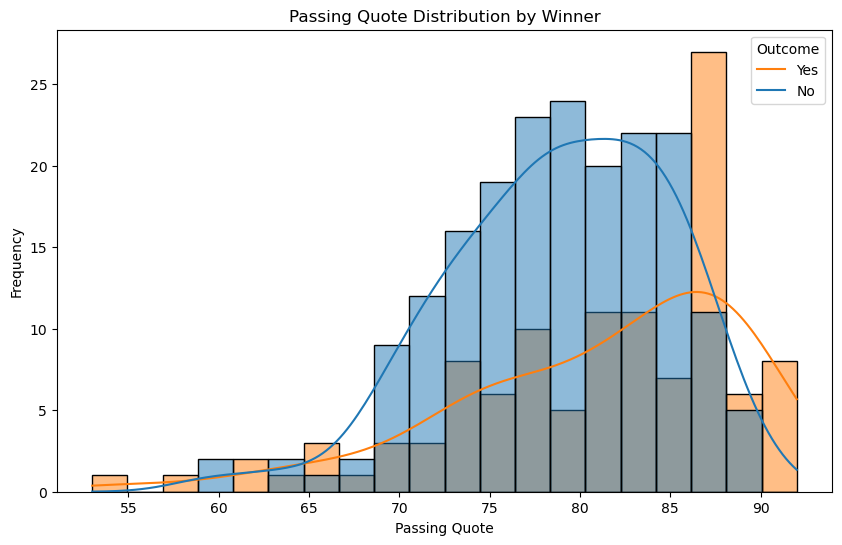

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "https://statistik.tu-dortmund.de/storages/statistik/r/Downloads/Studium/Studiengaenge-Infos/Data_Science/passes.csv"
df = pd.read_csv(data_url, delimiter=";")

# Display the first few rows of the dataset to identify variables
print("Variables in the dataset:")
print(df.head())

# Draw histogram visualization of passing quote distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='passing_quote', hue='winner', kde=True, bins=20)
plt.title('Passing Quote Distribution by Winner')
plt.xlabel('Passing Quote')
plt.ylabel('Frequency')

# Define legend labels
legend_labels = {'Yes': 'Winner', 'No': 'Loser'}
plt.legend(title='Outcome', labels=legend_labels)

plt.show()


In [6]:
# Find the number of observations (rows) in the dataset
num_observations = df.shape[0]

print(f"Number of observations: {num_observations}")

Number of observations: 306


In [8]:
# Calculate summary statistics of passing_quote column
passing_quote_stats = df['passing_quote'].describe()

# Extract specific statistics
maximum_passing_rate = passing_quote_stats['max']
minimum_passing_rate = passing_quote_stats['min']
standard_deviation = passing_quote_stats['std']
mean_passing_rate = passing_quote_stats['mean']

print(f"Maximum Passing Rate: {maximum_passing_rate}")
print(f"Minimum Passing Rate: {minimum_passing_rate}")
print(f"Standard Deviation: {standard_deviation}")
print(f"Mean Passing Rate: {mean_passing_rate}")


Maximum Passing Rate: 92.0
Minimum Passing Rate: 53.0
Standard Deviation: 6.960057978900341
Mean Passing Rate: 79.68092105263158


In [9]:
from scipy import stats

# Hypothesis Test 1: Winner vs. Loser Passing Quote
winner_passing_quotes = df[df['winner'] == 'Yes']['passing_quote']
loser_passing_quotes = df[df['winner'] == 'No']['passing_quote']

# Perform two-sample t-test
t_statistic_winner_vs_loser, p_value_winner_vs_loser = stats.ttest_ind(winner_passing_quotes, loser_passing_quotes)

# Hypothesis Test 2: Difference in Passing Quote for Draw vs. Winner Games
draw_passing_quotes = df[df['winner'] == 'No']['passing_quote']
winner_passing_quotes_mean = df[df['winner'] == 'Yes']['passing_quote'].mean()

# Perform one-sample t-test
t_statistic_draw_vs_winner, p_value_draw_vs_winner = stats.ttest_1samp(draw_passing_quotes, winner_passing_quotes_mean)

# Print results
print("Hypothesis Test 1 Results:")
print(f"T-statistic: {t_statistic_winner_vs_loser}, p-value: {p_value_winner_vs_loser}")

print("\nHypothesis Test 2 Results:")
print(f"T-statistic: {t_statistic_draw_vs_winner}, p-value: {p_value_draw_vs_winner}")


Hypothesis Test 1 Results:
T-statistic: 2.741802595638678, p-value: 0.006474765088259819

Hypothesis Test 2 Results:
T-statistic: -5.0760396309816045, p-value: 9.185976084246802e-07


In [10]:
from scipy import stats

# Hypothesis Test 1: Winner vs. Loser Passing Quote
winner_passing_quotes = df[df['winner'] == 'Yes']['passing_quote']
loser_passing_quotes = df[df['winner'] == 'No']['passing_quote']

# Perform two-sample t-test
t_statistic_winner_vs_loser, p_value_winner_vs_loser = stats.ttest_ind(winner_passing_quotes, loser_passing_quotes)

# Hypothesis Test 2: Difference in Passing Quote for Draw vs. Winner Games
draw_passing_quotes = df[df['winner'] == 'No']['passing_quote']
winner_passing_quotes_mean = df[df['winner'] == 'Yes']['passing_quote'].mean()

# Perform one-sample t-test
t_statistic_draw_vs_winner, p_value_draw_vs_winner = stats.ttest_1samp(draw_passing_quotes, winner_passing_quotes_mean)

# Print results
print("Results of Two-Sample t-Test (Winner vs. Loser Passing Quote):")
print(f"T-statistic: {t_statistic_winner_vs_loser}, p-value: {p_value_winner_vs_loser}")

print("\nResults of One-Sample t-Test (Difference in Passing Quote for Draw vs. Winner Games):")
print(f"T-statistic: {t_statistic_draw_vs_winner}, p-value: {p_value_draw_vs_winner}")


Results of Two-Sample t-Test (Winner vs. Loser Passing Quote):
T-statistic: 2.741802595638678, p-value: 0.006474765088259819

Results of One-Sample t-Test (Difference in Passing Quote for Draw vs. Winner Games):
T-statistic: -5.0760396309816045, p-value: 9.185976084246802e-07


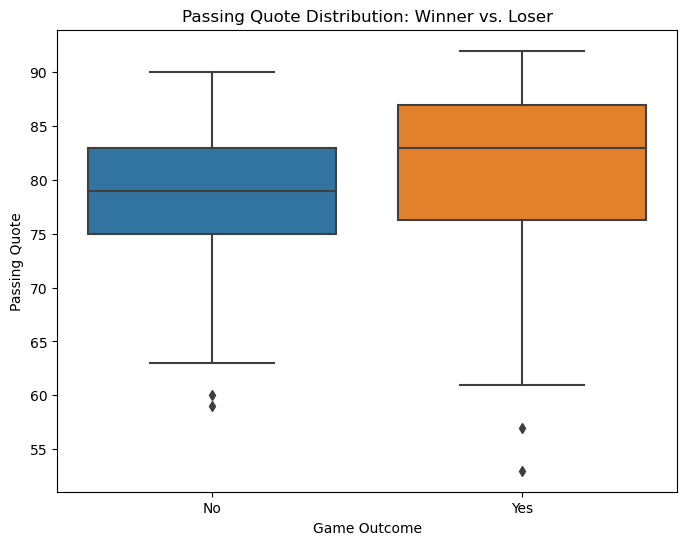

In [11]:
# Create boxplot or violin plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='winner', y='passing_quote', data=df)
plt.title('Passing Quote Distribution: Winner vs. Loser')
plt.xlabel('Game Outcome')
plt.ylabel('Passing Quote')
plt.show()



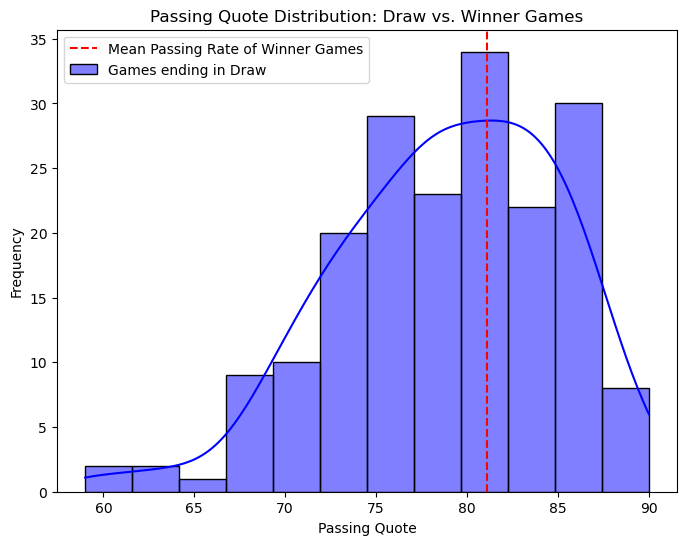

In [12]:
# Create histogram or density plot
plt.figure(figsize=(8, 6))
sns.histplot(draw_passing_quotes, kde=True, color='blue', label='Games ending in Draw')
plt.axvline(winner_passing_quotes_mean, color='red', linestyle='--', label='Mean Passing Rate of Winner Games')
plt.title('Passing Quote Distribution: Draw vs. Winner Games')
plt.xlabel('Passing Quote')
plt.ylabel('Frequency')
plt.legend()
plt.show()
